### KMeans_Clustering

### Step I:- 
Import the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

### Step II:-
Load the Dataset

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### step III:- 
Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable
called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index 
(0,1,2,3) for the above four columns are used.

In [8]:
X=df.iloc[:,[0,1,2,3]].values

### step IV:- 
    To implement the Elbow method,The elbow method is a useful graphical tool to estimate the optimal 
    number of clusters k for a given task.

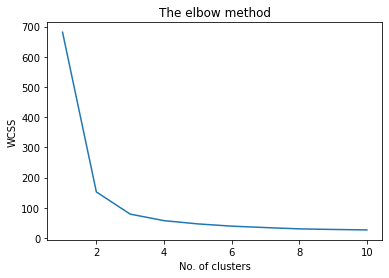

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. 
Let’s implement k-means again using k=3

### Step V:-
    Implementing the Kmeans clustering with K=3

In [11]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

kmeans.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### step VI:- 
Finally, its time to visualize the three clusters that were formed with the optimal k value.

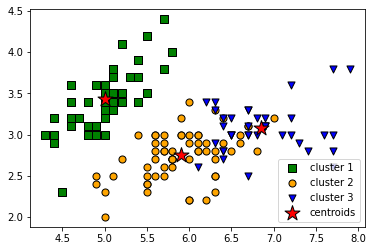

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=50, c='green', marker='s', edgecolor='black',label='cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=50, c='blue',marker='v', edgecolor='black',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.legend()

### Conclusion :-
    We made the model that predicts species of iris flowers in InterSystems. Also we noticed that the "cluster 1" is separable and "cluster 2" and "cluster 3" are not separable on K-Means algorithm.